## 1. Import Packeges

In [78]:
#!pip install numpy, matplotlib, pandas
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## 2. Dataset 

#### 2.1 Load "Fuel" Dataset

In [79]:
df = pd.read_csv('Fuel.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


#### 2.2 Describe Data Frame

In [80]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


#### 2.3 Separation of Required Data

The required data for us are as follows:
- ENGINESIZE
- FUELCONSUMPTION_CITY
- FUELCONSUMPTION_HWY
- FUELCONSUMPTION_COMB
- CO2EMISSIONS

In [81]:
cdf = df[['FUELCONSUMPTION_CITY', 'ENGINESIZE', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head()

,FUELCONSUMPTION_CITY,ENGINESIZE,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,9.9,2.0,6.7,8.5,196
1,11.2,2.4,7.7,9.6,221
2,6.0,1.5,5.8,5.9,136
3,12.7,3.5,9.1,11.1,255
4,12.1,3.5,8.7,10.6,244


#### 2.4 Plot Data 

Let's compare each of the house features with their respective prices and plot them below using Matplotlib.

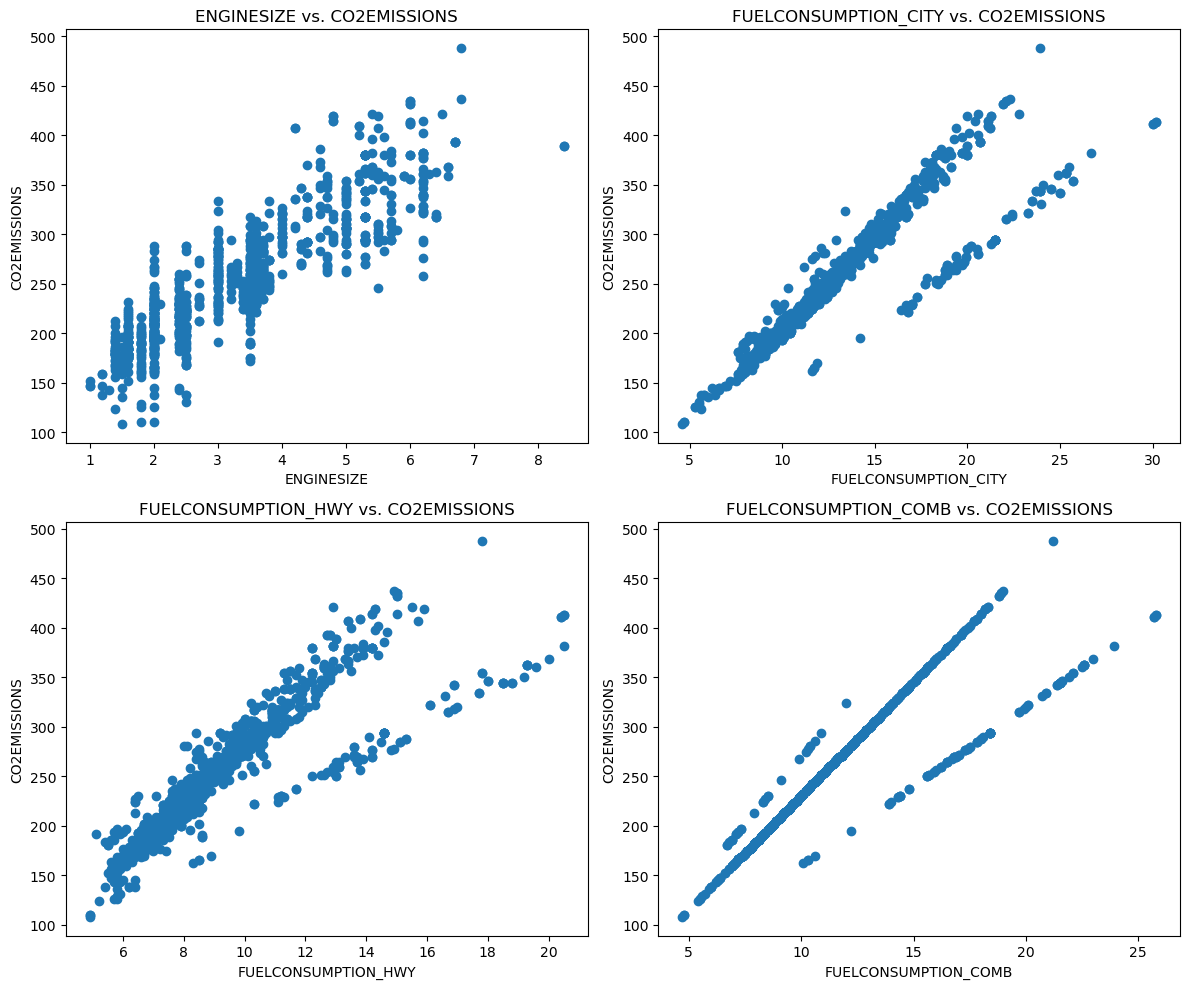

In [82]:
fig, axs = plt.subplots(2, 2, figsize = (12, 10))

axs[0, 0].plot(cdf["ENGINESIZE"], cdf["CO2EMISSIONS"], "o")
axs[0, 0].set_title("ENGINESIZE vs. CO2EMISSIONS")
axs[0, 0].set_xlabel("ENGINESIZE")
axs[0, 0].set_ylabel("CO2EMISSIONS")

axs[0, 1].plot(cdf["FUELCONSUMPTION_CITY"], cdf["CO2EMISSIONS"], "o")
axs[0, 1].set_title("FUELCONSUMPTION_CITY vs. CO2EMISSIONS")
axs[0, 1].set_xlabel("FUELCONSUMPTION_CITY")
axs[0, 1].set_ylabel("CO2EMISSIONS")

axs[1, 0].plot(cdf["FUELCONSUMPTION_HWY"], cdf["CO2EMISSIONS"], "o")
axs[1, 0].set_title("FUELCONSUMPTION_HWY vs. CO2EMISSIONS")
axs[1, 0].set_xlabel("FUELCONSUMPTION_HWY")
axs[1, 0].set_ylabel("CO2EMISSIONS")

axs[1, 1].plot(cdf["FUELCONSUMPTION_COMB"], cdf["CO2EMISSIONS"], "o")
axs[1, 1].set_title("FUELCONSUMPTION_COMB vs. CO2EMISSIONS")
axs[1, 1].set_xlabel("FUELCONSUMPTION_COMB")
axs[1, 1].set_ylabel("CO2EMISSIONS")

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

#### 2.5 Data Splitting

In this section, I divided the data into two parts, with 80% allocated for training and 20% for testing.

In [83]:
X = cdf[['FUELCONSUMPTION_CITY', 'ENGINESIZE', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']].to_numpy()
y = cdf[['CO2EMISSIONS']].to_numpy()
print(f"X_shape is: {X.shape}")
print(f"Y_shape is: {y.shape}\n\n")

split = int(0.8 * X.shape[0])

X_train = X[:split]
y_train = y[:split]
X_test  = X[split:]
y_test  = y[split:]

print(f"X_train Shape : {X_train.shape} -- First 5 Index of X_train is: \n{X_train[:5]}\n")
print(f"y_train Shape : {y_train.shape} -- First 5 Index of y_train is: \n{y_train[:5]}\n")
print(f"X_test Shape : {X_test.shape} -- First 5 Index of X_test is: \n{X_test[:5]}\n")
print(f"y_test Shape : {y_test.shape} -- First 5 Index of y_test is: \n{y_test[:5]}")

X_shape is: (1067, 4)
Y_shape is: (1067, 1)


X_train Shape : (853, 4) -- First 5 Index of X_train is: 
[[ 9.9  2.   6.7  8.5]
 [11.2  2.4  7.7  9.6]
 [ 6.   1.5  5.8  5.9]
 [12.7  3.5  9.1 11.1]
 [12.1  3.5  8.7 10.6]]

y_train Shape : (853, 1) -- First 5 Index of y_train is: 
[[196]
 [221]
 [136]
 [255]
 [244]]

X_test Shape : (214, 4) -- First 5 Index of X_test is: 
[[ 9.1  2.5  8.5  8.8]
 [12.5  3.5  9.5 11.1]
 [ 9.2  2.5  7.2  8.3]
 [ 9.5  2.5  7.4  8.6]
 [ 7.8  1.8  6.   7. ]]

y_test Shape : (214, 1) -- First 5 Index of y_test is: 
[[202]
 [255]
 [191]
 [198]
 [161]]


#### 2.6 Z-score Normalization

In [84]:
def zscore_normalize_features(X):
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    x_norm = (X - mu) / sigma

    return (x_norm, mu, sigma)

#### 2.6.1 Normalize the Data 

In [85]:
X_norm, mu_X, sigma_X = zscore_normalize_features(X_train)
y_norm, mu_y, sigma_y = zscore_normalize_features(y_train)

## 3. Building Model

#### 3.1 Compute Cost With Multiple Variables

In [86]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    sum_cost = 0
    for i in range(m):
        f_wb = np.dot(X[i], w) + b
        sum_cost += (f_wb - y[i]) ** 2 
    cost = (1 / (2 * m)) * sum_cost
    return cost

##### 3.1.1 Try It with Init(W, b)

In [87]:
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
b_init = 785.1811367994083
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : [67351.32501452]


#### 3.2 Gradient Descent With Multiple Variables

In [88]:
def compute_gradient(X, y, w, b):
    m, n = X.shape
    dj_db = 0.0
    dj_dw = np.zeros((n,))

    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        dj_db += err
        for j in range(n):
            dj_dw[j] += err * X[i, j]

    dj_db /= m
    dj_dw /= m
    return dj_db, dj_dw

##### 3.2.1 Try Gradient Descent

Compute and display gradient 

In [89]:
dj_db, dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {dj_db}')
print(f'dj_dw at initial w,b: \n {dj_dw}')

dj_db at initial w,b: [-232.01242518]
dj_dw at initial w,b: 
 [-4333.70199447 -1113.48977156 -3063.47777016 -3763.23646182]


C:\Users\Windows 11\AppData\Local\Temp\ipykernel_24348\36846584.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dj_dw[j] += err * X[i, j]


#### 3.3 Gradient Descent With Multiple Variables

In this section, we will construct the gradient descent algorithm and prepare it for training.

In [90]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):

    J_history = []
    w = w_in
    b = b_in

    for i in range(num_iters):
        dj_db, dj_dw = compute_gradient(X, y, w, b)

        w -= alpha * dj_dw
        b -= alpha * dj_db

        if i < 100000:
            J_history.append(compute_cost(X, y, w, b))

        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}")

    return w, b, J_history

In the next cell you will test the implementation. 

In [99]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.

# some gradient descent settings
iterations = 1000
alpha = 0.04

# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_norm, y_norm, initial_w, initial_b,compute_cost, compute_gradient, alpha, iterations)

#print the final w, b
print(f'b, w found by gradient descent: {b_final}, {w_final}')

C:\Users\Windows 11\AppData\Local\Temp\ipykernel_24348\36846584.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dj_dw[j] += err * X[i, j]


Iteration    0: Cost [0.3870848]
Iteration  100: Cost [0.07798052]
Iteration  200: Cost [0.07694626]
Iteration  300: Cost [0.07678588]
Iteration  400: Cost [0.07672587]
Iteration  500: Cost [0.076685]
Iteration  600: Cost [0.07665316]
Iteration  700: Cost [0.07662788]
Iteration  800: Cost [0.07660776]
Iteration  900: Cost [0.07659174]
b, w found by gradient descent: [4.14700188e-16], [0.27619431 0.44396245 0.04875259 0.1971832 ]


## 4. Plot The Result

In the section below, I have plotted all the data obtained so far, including the cost, and also plotted the line obtained for each feature and finally for all the features.

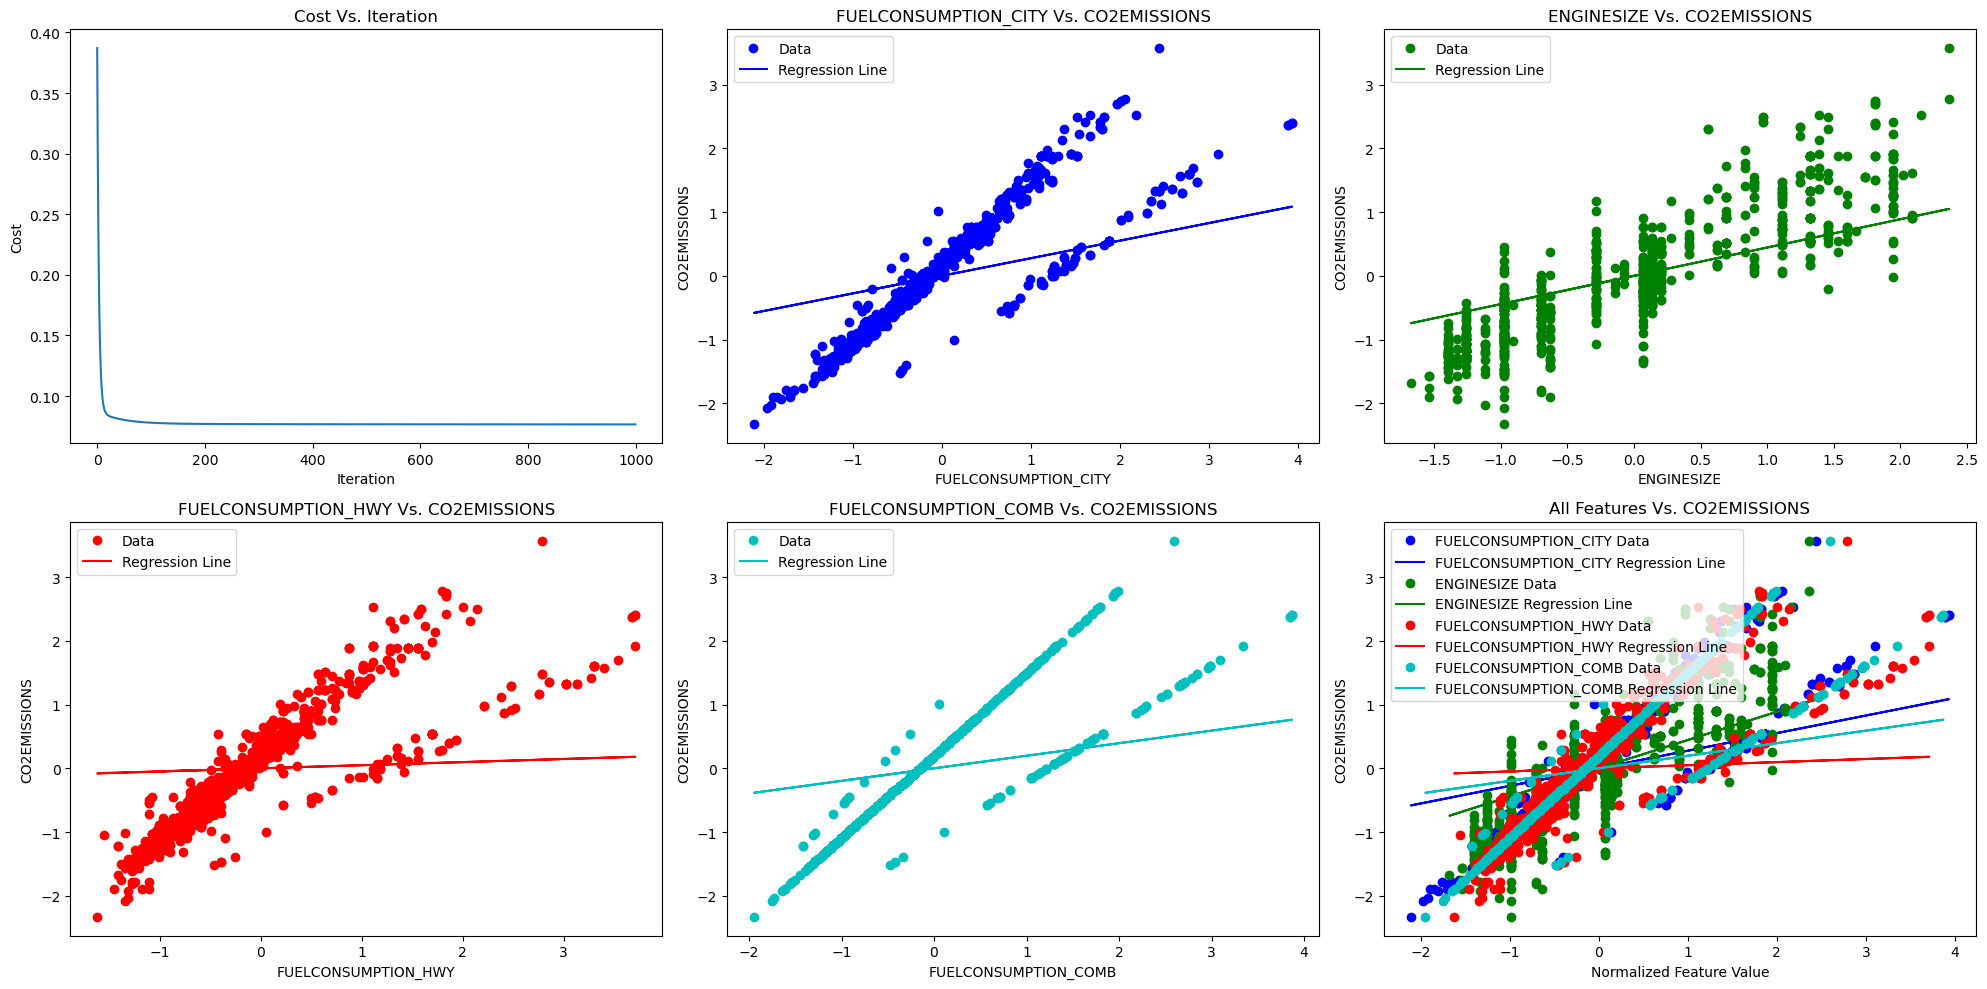

In [104]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

# Plot Cost vs. Iteration
ax[0, 0].plot(J_hist)
ax[0, 0].set_title("Cost Vs. Iteration")
ax[0, 0].set_xlabel("Iteration")
ax[0, 0].set_ylabel("Cost")

# Plot for each feature
features = ['FUELCONSUMPTION_CITY', 'ENGINESIZE', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']
colors = ['b', 'g', 'r', 'c']  # Colors for each feature plot

for i in range(4):
    row, col = divmod(i + 1, 3)
    ax[row, col].plot(X_norm[:, i], y_norm, 'o', label='Data', color=colors[i])
    yhat = w_final[i] * X_norm[:, i] + b_final
    ax[row, col].plot(X_norm[:, i], yhat, label='Regression Line', color=colors[i])
    ax[row, col].set_title(f"{features[i]} Vs. CO2EMISSIONS")
    ax[row, col].set_xlabel(features[i])
    ax[row, col].set_ylabel("CO2EMISSIONS")
    ax[row, col].legend()

# Combined plot for all features
for i in range(4):
    ax[1, 2].plot(X_norm[:, i], y_norm, 'o', label=f'{features[i]} Data', color=colors[i])
    yhat = w_final[i] * X_norm[:, i] + b_final
    ax[1, 2].plot(X_norm[:, i], yhat, label=f'{features[i]} Regression Line', color=colors[i])

ax[1, 2].set_title("All Features Vs. CO2EMISSIONS")
ax[1, 2].set_xlabel("Normalized Feature Value")
ax[1, 2].set_ylabel("CO2EMISSIONS")
ax[1, 2].legend()

plt.tight_layout()
plt.show()

## 5. Prediction

#### 5.1 Denormalize W, b

In [93]:
# Denormalize weights and bias
w = w_final * (sigma_y / sigma_X)
b = b_final * sigma_y + mu_y - np.sum((w_final * mu_X * sigma_y) / sigma_X)

print(f"Denormalized weights: {w_denorm}")
print(f"Denormalized bias: {b_denorm}")

Denormalized weights: [2.83316155e+02 2.96603120e+05 1.22562810e+06 2.98753857e+05]
Denormalized bias: [929221.78111979]


#### 5.2 Prediction Func and Print 

In [140]:
def predict(x, w, b):
    predict = []
    m, n = x.shape
    for i in range(m):
        prediction_i = np.dot(x[i], w) + b
        predict.append(prediction_i)
    return predict

In [141]:
def print_prediction(x, y):
    for i in range(len(x)):
        print(f'Y-hat of index {i} is : {x[i]} -- Y is : {y[i]}')

#### 5.3 Predict Random Value from Test Data

In [142]:
import random
if len(X_test) != len(y_test):
    raise ValueError("Both arrays must have the same length")

# Number of random items to select
num_items = 10

# Generate random indices without replacement
random_indices = random.sample(range(len(X_test)), num_items)
selected_test_x = np.asanyarray([X_test[i] for i in random_indices])
selected_test_y = np.asanyarray([y_test[i] for i in random_indices])
print(f'Selected test X:\n {selected_test_x}\n')
print(f'Selected test Y:\n {selected_test_y}\n')

prediction = predict(selected_test_x, w, b)

print_prediction(prediction, selected_test_y)

Selected test X:
 [[17.6  5.7 12.9 15.5]
 [ 9.5  1.8  7.2  8.5]
 [18.6  3.6 12.7 15.9]
 [10.9  2.   7.8  9.5]
 [10.9  2.4  8.6  9.9]
 [ 9.9  1.8  7.2  8.7]
 [16.1  4.  11.9 14.2]
 [18.1  5.7 13.9 16.2]
 [20.5  3.6 14.5 17.8]
 [14.3  4.  11.1 12.9]]

Selected test Y:
 [[356]
 [196]
 [254]
 [218]
 [228]
 [200]
 [327]
 [373]
 [285]
 [297]]

Y-hat of index 0 is : [338.24922508] -- Y is : [356]
Y-hat of index 1 is : [196.61126111] -- Y is : [196]
Y-hat of index 2 is : [301.37788338] -- Y is : [254]
Y-hat of index 3 is : [210.15360944] -- Y is : [218]
Y-hat of index 4 is : [221.29726751] -- Y is : [228]
Y-hat of index 5 is : [198.65240959] -- Y is : [200]
Y-hat of index 6 is : [292.98622327] -- Y is : [327]
Y-hat of index 7 is : [344.76701532] -- Y is : [373]
Y-hat of index 8 is : [318.67797843] -- Y is : [285]
Y-hat of index 9 is : [280.49505669] -- Y is : [297]


In [143]:
from sklearn.metrics import r2_score

predict = predict(X_test, w, b)

# Calculate R^2 score for test data
r2_test = r2_score(y_test, predict)
print(f"R^2 score for test data: {r2_test}")

R^2 score for test data: 0.9040943405741877
